In [1]:
import pandas as pd

In [2]:
df=pd.read_excel("C:\\Users\\Raju A S\\Downloads\\Airlines+Data.xlsx")
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
df.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


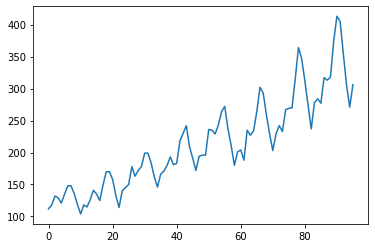

In [4]:
import matplotlib.pyplot as plt
plt.plot(df.iloc[:,1])

# Scaling


## LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. We can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.



In [5]:
from sklearn.preprocessing import MinMaxScaler
df.iloc[:,1]

0     112
1     118
2     132
3     129
4     121
     ... 
91    405
92    355
93    306
94    271
95    306
Name: Passengers, Length: 96, dtype: int64

In [6]:

scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df.iloc[:,1:])
df.shape

(96, 1)

In [7]:
df

array([[0.02588997],
       [0.04530744],
       [0.09061489],
       [0.08090615],
       [0.05501618],
       [0.10032362],
       [0.14239482],
       [0.14239482],
       [0.10355987],
       [0.04854369],
       [0.        ],
       [0.04530744],
       [0.03559871],
       [0.07119741],
       [0.1197411 ],
       [0.10032362],
       [0.06796117],
       [0.14563107],
       [0.21359223],
       [0.21359223],
       [0.17475728],
       [0.09385113],
       [0.03236246],
       [0.11650485],
       [0.13268608],
       [0.14886731],
       [0.2394822 ],
       [0.19093851],
       [0.22006472],
       [0.2394822 ],
       [0.30744337],
       [0.30744337],
       [0.25889968],
       [0.18770227],
       [0.13592233],
       [0.20064725],
       [0.21682848],
       [0.24595469],
       [0.28802589],
       [0.24919094],
       [0.25566343],
       [0.36893204],
       [0.40776699],
       [0.44660194],
       [0.33980583],
       [0.2815534 ],
       [0.22006472],
       [0.291

In [8]:
##splitting dataset into train and test split
training_size=int(len(df)*0.65)
training_size

62

In [9]:
test_size=len(df)-training_size
test_size

34

In [11]:
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]
train_data

array([[0.02588997],
       [0.04530744],
       [0.09061489],
       [0.08090615],
       [0.05501618],
       [0.10032362],
       [0.14239482],
       [0.14239482],
       [0.10355987],
       [0.04854369],
       [0.        ],
       [0.04530744],
       [0.03559871],
       [0.07119741],
       [0.1197411 ],
       [0.10032362],
       [0.06796117],
       [0.14563107],
       [0.21359223],
       [0.21359223],
       [0.17475728],
       [0.09385113],
       [0.03236246],
       [0.11650485],
       [0.13268608],
       [0.14886731],
       [0.2394822 ],
       [0.19093851],
       [0.22006472],
       [0.2394822 ],
       [0.30744337],
       [0.30744337],
       [0.25889968],
       [0.18770227],
       [0.13592233],
       [0.20064725],
       [0.21682848],
       [0.24595469],
       [0.28802589],
       [0.24919094],
       [0.25566343],
       [0.36893204],
       [0.40776699],
       [0.44660194],
       [0.33980583],
       [0.2815534 ],
       [0.22006472],
       [0.291

In [12]:
test_data

array([[0.42394822],
       [0.39805825],
       [0.42071197],
       [0.51779935],
       [0.6407767 ],
       [0.61165049],
       [0.50161812],
       [0.40453074],
       [0.32038835],
       [0.40453074],
       [0.44660194],
       [0.41747573],
       [0.52750809],
       [0.53398058],
       [0.53721683],
       [0.6828479 ],
       [0.84142395],
       [0.78640777],
       [0.67313916],
       [0.55016181],
       [0.43042071],
       [0.5631068 ],
       [0.58252427],
       [0.55987055],
       [0.68932039],
       [0.6763754 ],
       [0.69255663],
       [0.87378641],
       [1.        ],
       [0.97411003],
       [0.81229773],
       [0.65372168],
       [0.54045307],
       [0.65372168]])

In [13]:

import numpy as np
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [14]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
X_train.shape, y_train.shape

((57, 4), (57,))

In [16]:

import numpy as np
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)
X_train.shape

(57, 4, 1)

In [18]:

### Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=1,verbose=1)

Epoch 1/100
57/57 [==============================] - 3s 14ms/step - loss: 0.0203 - val_loss: 0.0982
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0110 - val_loss: 0.0647
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0349
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0102 - val_loss: 0.0308
Epoch 5/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0108 - val_loss: 0.0514
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0517
Epoch 7/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0505
Epoch 8/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0432
Epoch 9/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0435
Epoch 10/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0346
Epoch 11

57/57 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0121
Epoch 84/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0080
Epoch 85/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.0205
Epoch 86/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0141
Epoch 87/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0130
Epoch 88/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0113
Epoch 89/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0149
Epoch 90/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0155
Epoch 91/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0183
Epoch 92/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0293
Epoch 93/100


In [20]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 16ms/step


In [21]:
test_predict

array([[0.49828202],
       [0.5906728 ],
       [0.47936153],
       [0.368461  ],
       [0.3503585 ],
       [0.3121739 ],
       [0.42165533],
       [0.42880493],
       [0.3502437 ],
       [0.49793595],
       [0.4725504 ],
       [0.44617146],
       [0.6326311 ],
       [0.7477739 ],
       [0.5581102 ],
       [0.4602398 ],
       [0.4466114 ],
       [0.38616246],
       [0.5730174 ],
       [0.5398346 ],
       [0.443909  ],
       [0.62513703],
       [0.5636113 ],
       [0.5447571 ],
       [0.77525365],
       [0.81443644],
       [0.66326916],
       [0.5248764 ],
       [0.48561   ]], dtype=float32)

In [22]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
test_predict

array([[257.96915],
       [286.5179 ],
       [252.12273],
       [217.85446],
       [212.26079],
       [200.46175],
       [234.29149],
       [236.50073],
       [212.22531],
       [257.8622 ],
       [250.01808],
       [241.86699],
       [299.48303],
       [335.06213],
       [276.45605],
       [246.2141 ],
       [242.00293],
       [223.3242 ],
       [281.06238],
       [270.8089 ],
       [241.1679 ],
       [297.16736],
       [278.1559 ],
       [272.32996],
       [343.55338],
       [355.66086],
       [308.95016],
       [266.18683],
       [254.0535 ]], dtype=float32)

In [23]:
y_train.shape,train_predict.shape,train_predict

((57,),
 (57, 1),
 array([[127.22589 ],
        [122.76033 ],
        [138.9989  ],
        [147.25601 ],
        [144.74916 ],
        [135.1288  ],
        [123.177444],
        [112.05654 ],
        [125.07541 ],
        [115.41619 ],
        [128.14342 ],
        [140.68976 ],
        [131.99872 ],
        [126.74494 ],
        [153.50262 ],
        [167.69716 ],
        [162.49019 ],
        [153.46042 ],
        [134.24104 ],
        [122.53296 ],
        [148.11684 ],
        [142.30309 ],
        [147.89154 ],
        [178.35191 ],
        [153.82884 ],
        [171.43219 ],
        [177.03773 ],
        [196.58603 ],
        [190.01231 ],
        [174.20581 ],
        [159.61787 ],
        [150.50494 ],
        [172.68423 ],
        [168.41632 ],
        [176.0852  ],
        [189.56949 ],
        [172.1731  ],
        [180.46796 ],
        [220.17412 ],
        [219.34596 ],
        [226.01697 ],
        [187.51108 ],
        [184.19452 ],
        [174.66397 ],
        [199.2

In [24]:

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

174.41159094105532

In [25]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

174.41159094105532

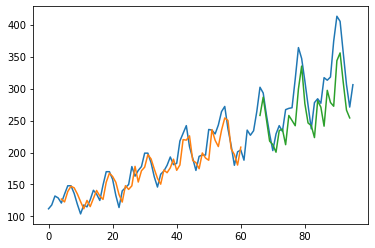

In [26]:
### Plotting 
# shift train predictions for plotting
look_back=4
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()